# 3. Apply Decision tree and random algorithm on  bank_modelling dataset with DV as a personal loan and find IDV using Random Forest Algorithm.

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

## Random Forest

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Loading bank loan dataset
bankloan_train = pd.read_excel("dataset/Bank_Personal_Loan_Modelling.xlsx",sheet_name=1)

In [4]:
bankloan_train.head().T

,0,1,2,3,4
ID,1.0,2.0,3.0,4.0,5.0
Age,25.0,45.0,39.0,35.0,35.0
Experience,1.0,19.0,15.0,9.0,8.0
Income,49.0,34.0,11.0,100.0,45.0
ZIP Code,91107.0,90089.0,94720.0,94112.0,91330.0
Family,4.0,3.0,1.0,1.0,4.0
CCAvg,1.6,1.5,1.0,2.7,1.0
Education,1.0,1.0,1.0,2.0,2.0
Mortgage,0.0,0.0,0.0,0.0,0.0
Personal Loan,0.0,0.0,0.0,0.0,0.0


In [5]:
# Finding null values
bankloan_train.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
# Variables in bank loan dataset
bankloan_train.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [7]:
# Initialising random forest model
rf_model = RandomForestClassifier(n_estimators=1000,max_features=2,oob_score=True)

In [8]:
features=["Age","Experience","Income","Family","CCAvg","Education","Mortgage","Securities Account",
         "CD Account","Online","CreditCard"]

In [9]:
rf_model.fit(X=bankloan_train[features],y=bankloan_train["Personal Loan"])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
print("OOB Accuracy:", rf_model.oob_score_)

OOB Accuracy: 0.9876


In [11]:
# To find important features
for feature,imp in zip(features,rf_model.feature_importances_):
    print(feature,imp)

Age 0.045315611442142675
Experience 0.04420690233362509
Income 0.3461679600112819
Family 0.0939157951733991
CCAvg 0.18537599415713288
Education 0.1638787479425478
Mortgage 0.04381327544098473
Securities Account 0.005468552534002002
CD Account 0.05385792638793491
Online 0.008282127177363225
CreditCard 0.009717107399585647


### Most important features are Income, CCAvg and Education

## 2. Creating Decision Tree Model

In [12]:
# Initialising Decision Tree
tree_model = tree.DecisionTreeClassifier(max_depth=8)

In [13]:
predictors = pd.DataFrame([bankloan_train["Income"],bankloan_train["CCAvg"],bankloan_train["Education"]]).T

In [14]:
# Model created
tree_model.fit(X=predictors,y=bankloan_train["Personal Loan"])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
with open("Dtree_BankLoan.dot","w") as f:
    f = tree.export_graphviz(tree_model,feature_names=["Income","CCAvg","Education"],out_file=f)

In [16]:
# Model accuracy
tree_model.score(X=predictors,y=bankloan_train["Personal Loan"])

0.9816

## Decision Tree

In [17]:
text_representation = tree.export_text(tree_model,feature_names=["Income","CCAvg","Education"])
print(text_representation)

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- CCAvg <= 0.35
|   |   |   |   |   |--- CCAvg <= 0.25
|   |   |   |   |   |   |--- Income <= 112.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Income >  112.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- CCAvg >  0.25
|   |   |   |   |   |   |--- Income <= 111.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Income >  111.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- CCAvg >  0.35
|   |   |   |   |   |--- Income <= 109.50
|   |   |   |   |   |   |--- CCAvg <= 1.75
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- CCAvg >  1.75
|   |   |   |   |   |   |   |--- CCAvg <= 1.90
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- CCAvg >  1.90
|   |   |   |   |   |   

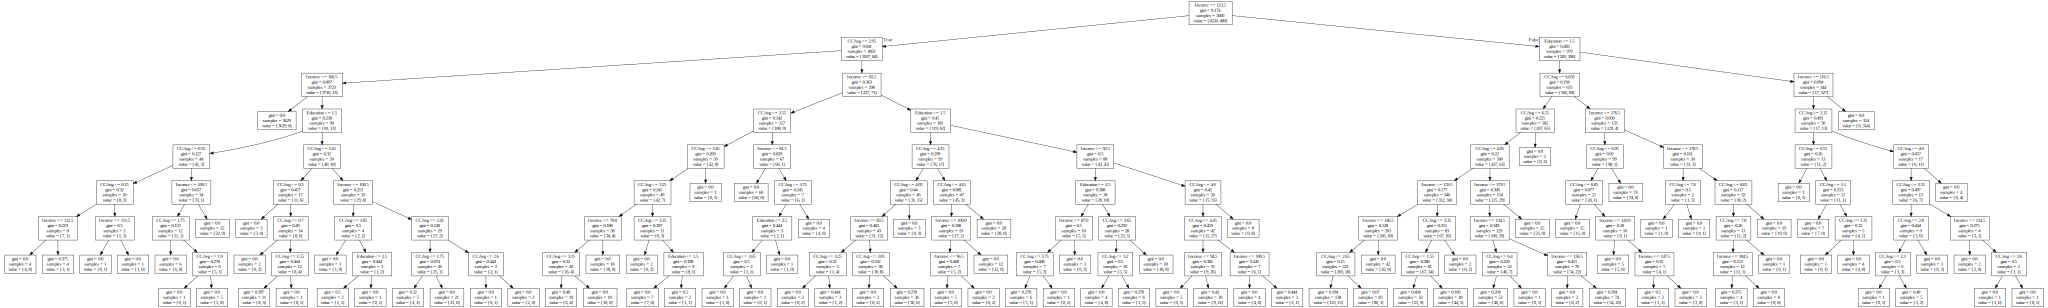

In [18]:
graph = Source(tree.export_graphviz(tree_model,feature_names=["Income","CCAvg","Education"],out_file=f))

display(SVG(graph.pipe(format='svg')))